Objective

To develop a machine learning model that can predict the presence and absence of heart disease on individuals based on various medical and lifestyle factors

Background

Heart disease is a leading cause of mortality worldwide. Early detention and accurate cause of heart disease can significantly improve patients'outcome by enabling timely intervention and preventive measures

Scope

The project is done on the patients of Parkway Pantai

Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [10]:
Data = pd.read_csv("cardio_data1.csv")

In [11]:
Data

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,03-04-2018,Singapore,99993,1,19240,0,120,80,1,2,1,168,Doctor,1,76.0,0
69996,12-01-2022,Malaysia,99995,1,22601,0,140,90,2,1,2,158,Accountant,0,126.0,1
69997,25-08-2022,Malaysia,99996,0,19066,1,180,90,3,2,1,183,Accountant,0,105.0,1
69998,13-07-2020,Singapore,99998,0,22431,0,135,80,1,1,2,163,Accountant,0,72.0,1


In [12]:
Data.head()

,date,country,id,active,age,alco,ap_hi,ap_lo,cholesterol,gender,gluc,height,occupation,smoke,weight,disease
0,03-05-2021,Indonesia,0,1,18393,0,110,80,1,2,1,168,Architect,0,62.0,0
1,05-08-2021,Malaysia,1,1,20228,0,140,90,3,1,1,156,Accountant,0,85.0,1
2,13-11-2022,Indonesia,2,0,18857,0,130,70,3,1,1,165,Chef,0,64.0,1
3,31-10-2018,Singapore,3,1,17623,0,150,100,1,2,1,169,Lawyer,0,82.0,1
4,25-09-2020,Singapore,4,0,17474,0,100,60,1,1,1,156,Architect,0,56.0,0


EDA (Exploratory Data Analysis)

In [14]:
Data.shape

(70000, 16)

In [15]:
list(Data)

['date',
 'country',
 'id',
 'active',
 'age',
 'alco',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gender',
 'gluc',
 'height',
 'occupation',
 'smoke',
 'weight',
 'disease']

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  occupation   70000 non-null  object 
 13  smoke        70000 non-null  int64  
 14  weight       70000 non-null  float64
 15  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 8.5+ MB


Check for Missing Values

In [19]:
Data.isnull().sum()

date           0
country        0
id             0
active         0
age            0
alco           0
ap_hi          0
ap_lo          0
cholesterol    0
gender         0
gluc           0
height         0
occupation     0
smoke          0
weight         0
disease        0
dtype: int64

Analyses and Visualizations

<Axes: xlabel='gender', ylabel='count'>

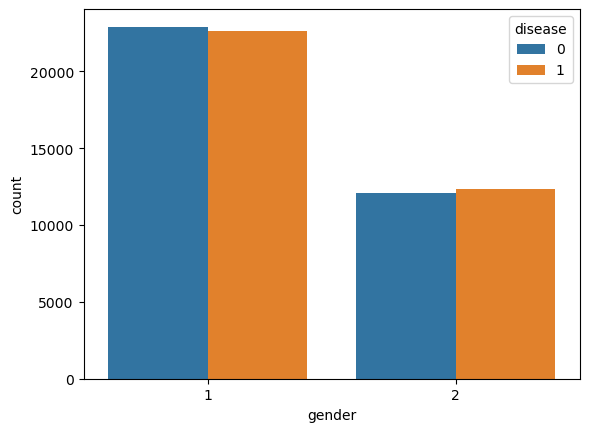

In [21]:
sns.countplot(x='gender',hue='disease', data=Data)

<Axes: xlabel='cholesterol', ylabel='disease'>

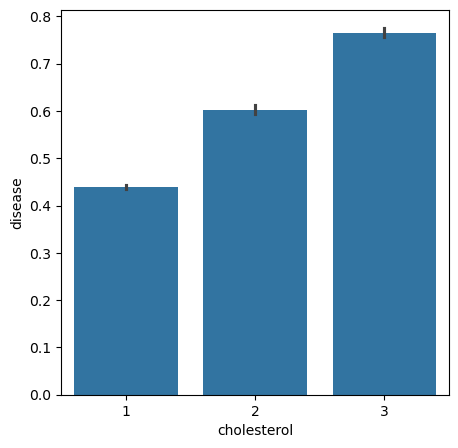

In [22]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="cholesterol", y='disease', data=Data)

<Axes: xlabel='disease', ylabel='ap_hi'>

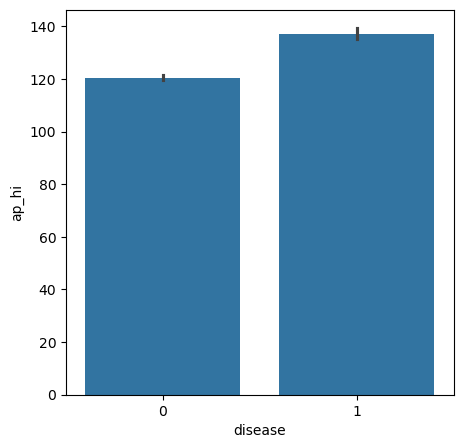

In [23]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="disease", y='ap_hi', data=Data)

<Axes: xlabel='disease', ylabel='alco'>

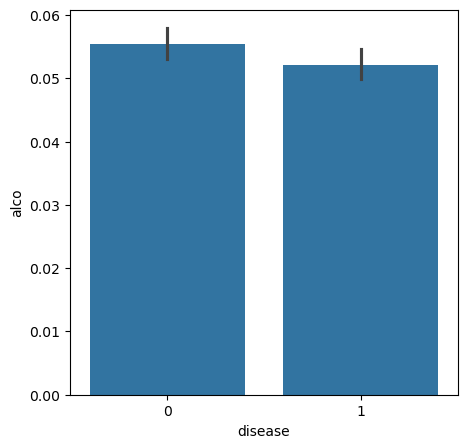

In [24]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x="disease", y='alco', data=Data)

In [25]:
X = Data.drop(columns =["occupation"], axis=1, inplace=True) #Dropping a column

In [26]:
X

In [27]:
list(Data)

['date',
 'country',
 'id',
 'active',
 'age',
 'alco',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gender',
 'gluc',
 'height',
 'smoke',
 'weight',
 'disease']

In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         70000 non-null  object 
 1   country      70000 non-null  object 
 2   id           70000 non-null  int64  
 3   active       70000 non-null  int64  
 4   age          70000 non-null  int64  
 5   alco         70000 non-null  int64  
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gender       70000 non-null  int64  
 10  gluc         70000 non-null  int64  
 11  height       70000 non-null  int64  
 12  smoke        70000 non-null  int64  
 13  weight       70000 non-null  float64
 14  disease      70000 non-null  int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 8.0+ MB


Feature Selection

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['country']=le.fit_transform(Data['country'])

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['date']=le.fit_transform(Data['date'])

In [33]:
Data=pd.get_dummies(Data, drop_first = True)

In [34]:
list(Data)

['date',
 'country',
 'id',
 'active',
 'age',
 'alco',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gender',
 'gluc',
 'height',
 'smoke',
 'weight',
 'disease']

Correlation Check or Multicollinearity Check

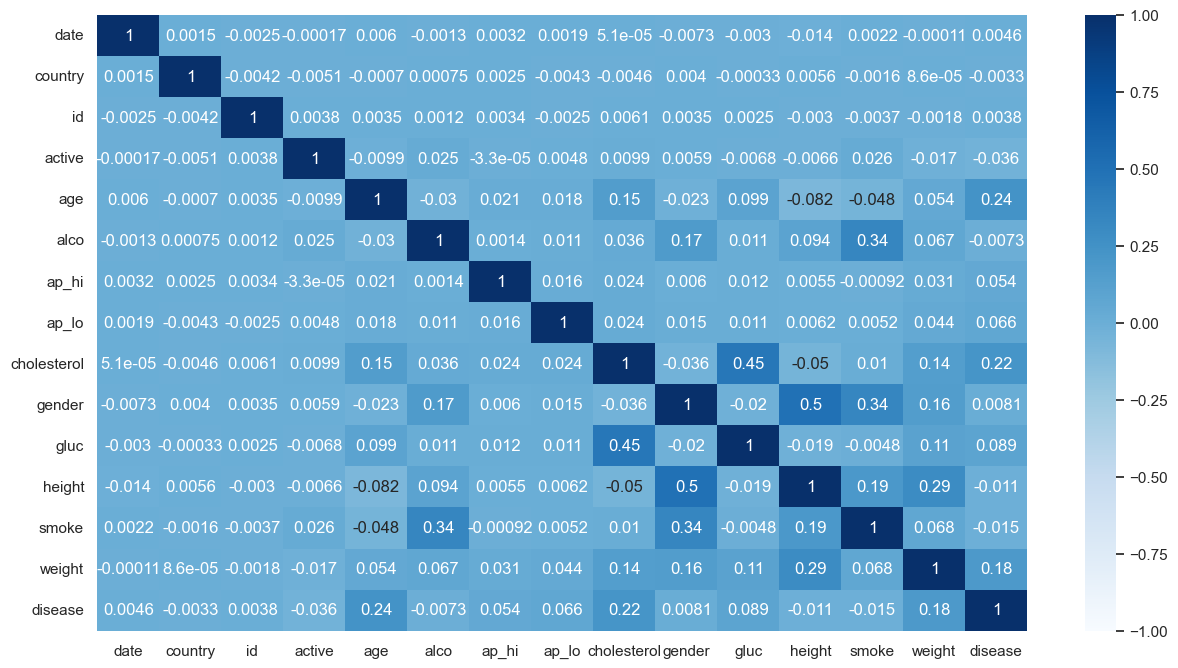

In [37]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(Data.corr(), annot=True, vmin =-1, vmax= 1, cmap = 'Blues')
plt.show()

Modelling (Data Transformation)

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['country']=le.fit_transform(Data['country'])

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['date']=le.fit_transform(Data['date'])

Modelling (Splitting the dataset into independent (x) and dependent variables (y))

In [42]:
x = Data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13]].values
y = Data.iloc[:,14].values


In [43]:
x

array([[0.0000e+00, 1.0000e+00, 1.8393e+04, ..., 1.6800e+02, 0.0000e+00,
        6.2000e+01],
       [1.0000e+00, 1.0000e+00, 2.0228e+04, ..., 1.5600e+02, 0.0000e+00,
        8.5000e+01],
       [2.0000e+00, 0.0000e+00, 1.8857e+04, ..., 1.6500e+02, 0.0000e+00,
        6.4000e+01],
       ...,
       [9.9996e+04, 0.0000e+00, 1.9066e+04, ..., 1.8300e+02, 0.0000e+00,
        1.0500e+02],
       [9.9998e+04, 0.0000e+00, 2.2431e+04, ..., 1.6300e+02, 0.0000e+00,
        7.2000e+01],
       [9.9999e+04, 1.0000e+00, 2.0540e+04, ..., 1.7000e+02, 0.0000e+00,
        7.2000e+01]])

In [44]:
y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

Modelling (Splitting the dataset into training and testing)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state =0)

In [47]:
x.shape,x_train.shape,x_test.shape

((70000, 12), (56000, 12), (14000, 12))

Modelling (Scaling the dataset)

In [49]:
from sklearn.preprocessing import StandardScaler
Standard=StandardScaler()
x_train= Standard.fit_transform(x_train)
x_test= Standard.transform(x_test)

In [50]:
pd.crosstab(y,y)
pd.crosstab(y_train,y_train)
pd.crosstab(y_test,y_test)

col_0,0,1
row_0,,
0,7069,0
1,0,6931


Modelling (LogisticRegression Deployment)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
classifier =LogisticRegression(random_state =0)

In [54]:
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

Performace Parameters

In [56]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [132]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[5693 1376]
 [2413 4518]]
Test accuracy score  0.7293571428571428
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      7069
           1       0.77      0.65      0.70      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

[[22541  5411]
 [ 9481 18567]]
Train accuracy score  0.7340714285714286
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     27952
           1       0.77      0.66      0.71     28048

    accuracy                           0.73     56000
   macro avg       0.74      0.73      0.73     56000
weighted avg       0.74      0.73      0.73     56000



Modelling (SVM Deployment)

In [135]:
from sklearn.svm import SVC

In [137]:
classifier = SVC(kernel='linear', random_state =0)

In [139]:
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

Performace Parameters

In [141]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [142]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[5750 1319]
 [2579 4352]]
Test accuracy score  0.7215714285714285
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      7069
           1       0.77      0.63      0.69      6931

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

[[22658  5294]
 [10145 17903]]
Train accuracy score 0.7243035714285714
              precision    recall  f1-score   support

           0       0.69      0.81      0.75     27952
           1       0.77      0.64      0.70     28048

    accuracy                           0.72     56000
   macro avg       0.73      0.72      0.72     56000
weighted avg       0.73      0.72      0.72     56000



Modelling (DecisionTree Deployment)

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
classifier = DecisionTreeClassifier(criterion= "entropy", random_state= 2)

In [146]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

Performace Parameters

In [148]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [149]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[4521 2548]
 [2602 4329]]
Test accuracy score  0.6321428571428571
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      7069
           1       0.63      0.62      0.63      6931

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000

[[27952     0]
 [    0 28048]]
Train accuracy score  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27952
           1       1.00      1.00      1.00     28048

    accuracy                           1.00     56000
   macro avg       1.00      1.00      1.00     56000
weighted avg       1.00      1.00      1.00     56000



Modelling (AdaBoost Deployment)

In [151]:
from sklearn.ensemble import AdaBoostClassifier

In [152]:
classifier=AdaBoostClassifier(n_estimators=500, learning_rate=1)

In [153]:
classifier.fit(x_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, n_estimators=500)

Performace Parameters

In [155]:
y_pred= classifier.predict(x_test)
y_pred1= classifier.predict(x_train)

In [156]:
print(confusion_matrix(y_test,y_pred))
print('Test accuracy score ',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_train,y_pred1))
print('Train accuracy score ',accuracy_score(y_train,y_pred1))
print(classification_report(y_train,y_pred1))
    

[[5693 1376]
 [2413 4518]]
Test accuracy score  0.7293571428571428
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      7069
           1       0.77      0.65      0.70      6931

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

[[22541  5411]
 [ 9481 18567]]
Train accuracy score  0.7340714285714286
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     27952
           1       0.77      0.66      0.71     28048

    accuracy                           0.73     56000
   macro avg       0.74      0.73      0.73     56000
weighted avg       0.74      0.73      0.73     56000



Summary and Conclusion

Not all models provided good fit and performance. Model like DecisionTree did perform very low.

Adaboost, LogisticRegression, and SVM performed relatively well and can be used for to evaluate the presence and absence of heart disease